In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt


In [2]:
# Feedforward Neural Network class
class FNN(nn.Module):
    def __init__(self):
        super(FNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)   # Input layer (784 neurons -> 128 neurons)
        self.fc2 = nn.Linear(128, 64)    # Hidden layer 1 (128 neurons -> 64 neurons)
        self.fc3 = nn.Linear(64, 10)     # Hidden layer 2 (64 neurons -> 10 neurons)
    
    def forward(self, x):
        x = x.view(-1, 784)             # Flatten the input image
        x = torch.relu(self.fc1(x))     # Applying ReLU activation to the first hidden layer
        x = torch.relu(self.fc2(x))     # Applying ReLU activation to the second hidden layer
        x = self.fc3(x)                 # Output layer (no activation)
        return torch.log_softmax(x, dim=1)  # Apply log softmax activation to get probabilities


In [3]:
# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [4]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [5]:
# Initialize the model, loss function, and optimizer
model = FNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [6]:
# Training the model
def train(model, train_loader, optimizer, criterion, epochs=10):
    train_losses = []
    for epoch in range(1, epochs + 1):
        running_loss = 0.0
        for batch_idx, (data, target) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if batch_idx % 100 == 99:    # Print every 100 mini-batches
                print('Epoch {} Batch {} - Training Loss: {:.6f}'.format(
                    epoch, batch_idx+1, running_loss / 100))
                train_losses.append(running_loss / 100)
                running_loss = 0.0
    return train_losses

In [7]:
# Testing the model
def test(model, test_loader):
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = 100. * correct / len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))
    return test_loss

In [8]:
# Train the model
train_losses = train(model, train_loader, optimizer, criterion)

# Test the model
test_loss = test(model, test_loader)

Epoch 1 Batch 100 - Training Loss: 2.209085
Epoch 1 Batch 200 - Training Loss: 1.883373
Epoch 1 Batch 300 - Training Loss: 1.372898
Epoch 1 Batch 400 - Training Loss: 0.972442
Epoch 1 Batch 500 - Training Loss: 0.753130
Epoch 1 Batch 600 - Training Loss: 0.623569
Epoch 1 Batch 700 - Training Loss: 0.541924
Epoch 1 Batch 800 - Training Loss: 0.495834
Epoch 1 Batch 900 - Training Loss: 0.473582
Epoch 2 Batch 100 - Training Loss: 0.406822
Epoch 2 Batch 200 - Training Loss: 0.401434
Epoch 2 Batch 300 - Training Loss: 0.398137
Epoch 2 Batch 400 - Training Loss: 0.377221
Epoch 2 Batch 500 - Training Loss: 0.376570
Epoch 2 Batch 600 - Training Loss: 0.369814
Epoch 2 Batch 700 - Training Loss: 0.360163
Epoch 2 Batch 800 - Training Loss: 0.363684
Epoch 2 Batch 900 - Training Loss: 0.346367
Epoch 3 Batch 100 - Training Loss: 0.332101
Epoch 3 Batch 200 - Training Loss: 0.337202
Epoch 3 Batch 300 - Training Loss: 0.312410
Epoch 3 Batch 400 - Training Loss: 0.318886
Epoch 3 Batch 500 - Training Los

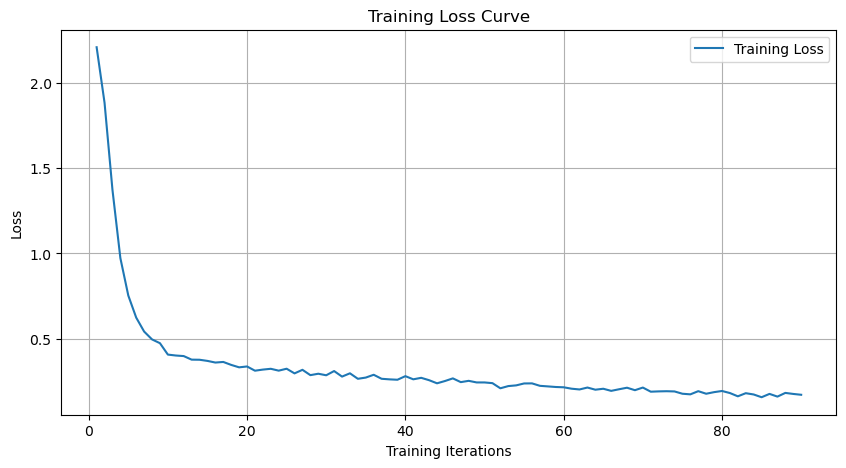

In [9]:
# Plot of the training loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()


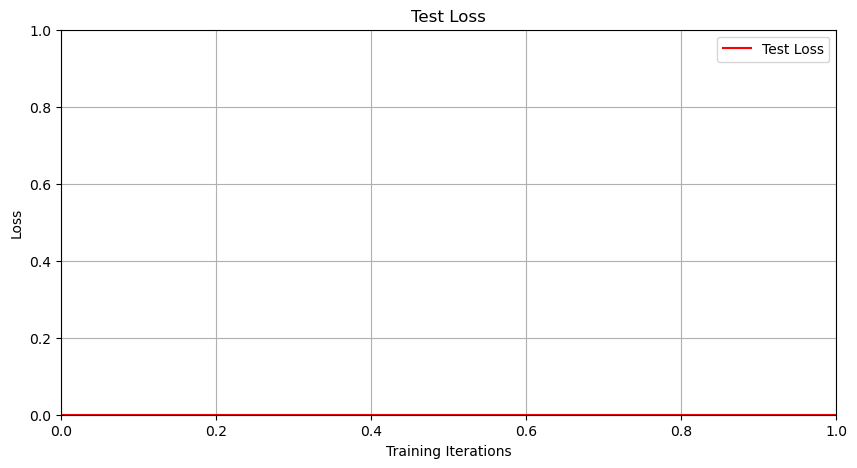

In [10]:

# Plot of the test loss
plt.figure(figsize=(10, 5))
plt.axhline(y=test_loss, color='r', linestyle='-', label='Test Loss')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.title('Test Loss')
plt.legend()
plt.grid(True)
plt.show()
